In [136]:
import pandas as pd
import plotnine as pn
import numpy as np

from scipy.stats import ttest_1samp


In [137]:
df = pd.read_csv("/Users/nathanielimel/uw/projects/modals-effcomm/outputs/universe=experiment_prohibition/prior=semi_estimated/utility=importance/agent_type=literal/analysis/all_data.csv")

# Create alias for faceting
df["facet_var"] = df["original_name"] + " and variants"

pareto_data = df[df["dominant"] == True]
natural_data = df[df["natural"] == True]
variants_data = df[df["name"].str.contains("_variant_")]

/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/facets/facet.py:487: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.1

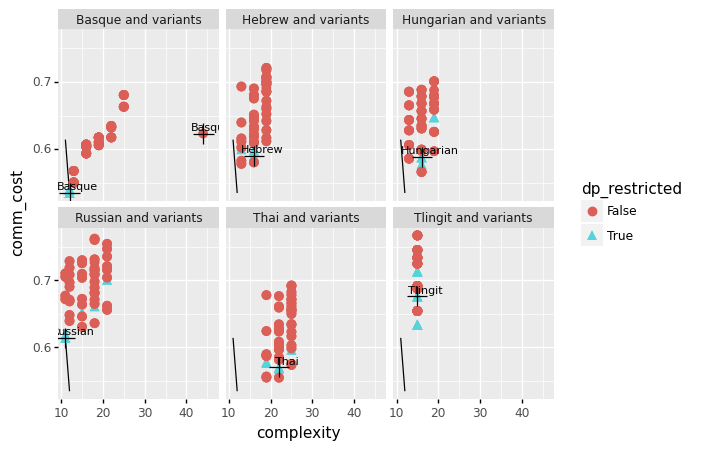

<ggplot: (401513271)>

In [138]:
# Facet plot
(
  # Set data and the axes
  pn.ggplot(
    mapping=pn.aes(x="complexity", y="comm_cost"),
  )
  + pn.geom_line(
    # remove faceting variable here so it is present in facet_wrap
    data=pareto_data.drop(["facet_var"], axis=1),
  )
  + pn.geom_point(  # all langs
      data=df,
      stroke=0,
      # alpha=.5,
      mapping=pn.aes(
        # color=original_name,
        color="dp_restricted",
        shape="dp_restricted",
      ),
      size=4,
  )
  + pn.geom_point( # natural langs
    data=natural_data,
    shape="+",
    size=8,
  )
  # Annotate originals
  + pn.geom_text(
    data=natural_data,
    mapping=pn.aes(label="name"),
    size=8,
    nudge_x=2,
    nudge_y=0.01,
  )  
  
  + pn.facet_wrap("facet_var")
  
#   + pn.scale_color_discrete()

)

In [150]:
# stats

# For each natural language, 
# get the increase in optimality it has over variants, for each variant
# Visualize this for each language
# And report the ttest(increase, 0)

for lang in natural_data.original_name:
    # If DP has higher optimality, then this should be a list of positive floats
    lang_variants = variants_data[variants_data["original_name"] == lang]
    print(lang)
    natural_data[natural_data["original_name"] == lang].optimality.item() - lang_variants.optimality

Thai
Hungarian
Russian
Tlingit
Hebrew
Basque


ValueError: can only convert an array of size 1 to a Python scalar

In [153]:
natural_data[natural_data["original_name"] == "Basque"]

605    0.999977
606    0.480151
Name: optimality, dtype: float64

In [149]:
dfs = []
for lang in natural_data.original_name:
    # If DP has higher optimality, then this should be a list of positive floats
    lang_variants = variants_data[variants_data["original_name"] == lang]
    optimality_increase = list(
        natural_data[natural_data["original_name"] == lang].optimality.item()
        - lang_variants.optimality
    )
    dfs.append(
        pd.DataFrame(
            data = zip(
                [lang]*len(optimality_increase), 
                optimality_increase,
                lang_variants.name,
                lang_variants.dp_restricted,
            ),
            columns = ["name", "gain_over_variant", "variant", "dp_restricted"],
        )
    )
df_opt_gain = pd.concat(dfs)
df_opt_gain

0     0.836004
1     0.824631
2     0.815776
3     0.824631
4     0.815776
        ...   
95    0.830715
96    0.769229
97    0.788203
98    0.772236
99    0.788203
Name: optimality, Length: 100, dtype: float64
100    0.926708
101    0.908167
102    0.887678
103    0.908167
104    0.887678
         ...   
195    0.856418
196    0.846177
197    0.877808
198    0.852249
199    0.877808
Name: optimality, Length: 100, dtype: float64
200    0.975426
201    0.922655
202    0.892036
203    0.922655
204    0.892036
         ...   
295    0.811294
296    0.832995
297    0.884013
298    0.840949
299    0.884013
Name: optimality, Length: 100, dtype: float64
300    0.899730
301    0.853377
302    0.824867
303    0.853377
304    0.824867
         ...   
395    0.853377
396    0.860825
397    0.927436
398    0.870314
399    0.927436
Name: optimality, Length: 100, dtype: float64
400    0.926289
401    0.907025
402    0.886214
403    0.907025
404    0.886214
         ...   
495    0.918559
496    0.83

ValueError: can only convert an array of size 1 to a Python scalar

In [142]:
(
    pn.ggplot(
        df_opt_gain,
        pn.aes(
            x = "gain_over_variant",
            # y = pn.after_stat("count"),
           fill = "name", color = "name",
        )
    )
    + pn.geom_density(
        alpha = 0.1, 
        # position = "stack",
    )
    # + pn.facet_wrap("dp_restricted")
)

/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_density : Removed 700 rows containing non-finite values.


ValueError: No objects to concatenate

In [ ]:
dfs = []
for lang in natural_data.name:
    # both the lang and its variants
    langs = df[df["original_name"] == lang]
    dp_opt = langs[langs["dp_restricted"] == True]["optimality"].mean()
    nondp_opt = langs[langs["dp_restricted"] == False]["optimality"].mean()
    dfs.append(
        pd.DataFrame(
            {
                "lang": [lang],
                "dp": [dp_opt],
                "nondp": [nondp_opt],
                "dp - nondp": [dp_opt - nondp_opt],
            }
        )
    )
df_mean_diff = pd.concat(dfs)
df_mean_diff

,lang,dp,nondp,dp - nondp
0,Thai,0.720626,0.680182,0.040444
0,Hungarian,0.847398,0.855590,-0.008192
0,Russian,0.862922,0.818770,0.044152
0,Tlingit,0.867673,0.843153,0.024520
0,Hebrew,0.869006,0.826326,0.042679
0,Basque,0.999181,0.796375,0.202806


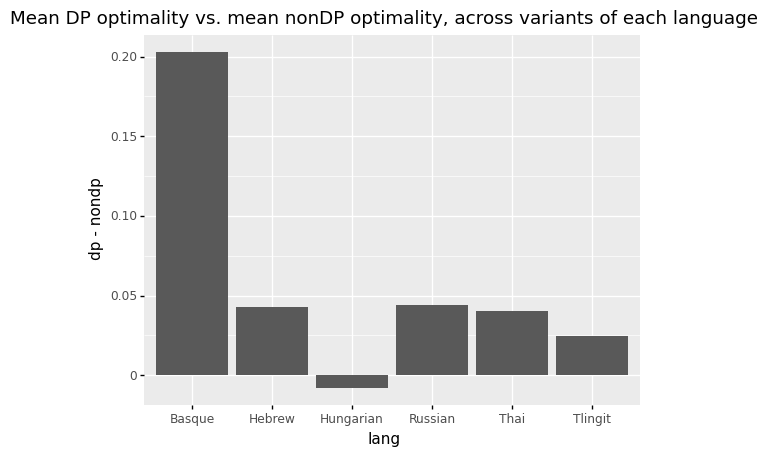

<ggplot: (397207736)>

In [ ]:
(
    pn.ggplot(
        df_mean_diff,
        pn.aes(
            x= "lang",
            y = "dp - nondp",
        )
    )
    # + pn.geom_point()
    + pn.geom_col()
    + pn.ggtitle("Mean DP optimality vs. mean nonDP optimality, across variants of each language")
)